- [Parte 1](https://colab.research.google.com/drive/1KSwxxJ_QQN6aUCalBSNigiIMmA6MtlGP)
---

* Variable aleatoria
* Vector aleatorio
* Inferencia
---

# Analisis multivariado

* Acp
* Acs
* Cluster

---

In [ ]:
!pip install pandas numpy matplotlib statsmodels seaborn scipy prince sklearn factor_analyzer

### Variable aleatoria

A diferencia de las variables comunes, las variables aleatorias van desde un espacio muestral hacia los reales. Tome como muestra alguno de los siguientes ejemplos:

- Población de personas de la tercera edad en una ciudad
- Población de caries en un colegio
- Población de bebes nacidos en un hospital
- Población de bacterias en el agua

---

### Tipos de variables aleatorias

- Discretas (Binomial, Poisson, Geometrica,...)
- Continuas (Normal, Gamma, Beta,...)

---

### Escalas

- Ordinal: La escala más debil de todas.
- Nominal: Variables categóricas.
- Intervalo: Magnitudes como la temperatura
- Razón: Comparables

---

<Axes: ylabel='Count'>

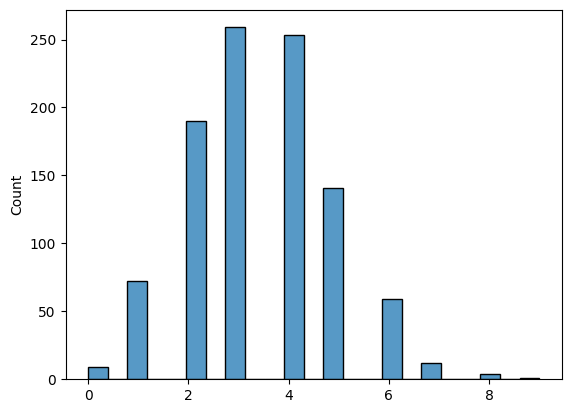

In [ ]:
import scipy.stats as ss
import numpy as np
import seaborn as sns

binom = ss.binom(10,1/3).rvs(size=1000)
sns.histplot(binom)

<Axes: ylabel='Count'>

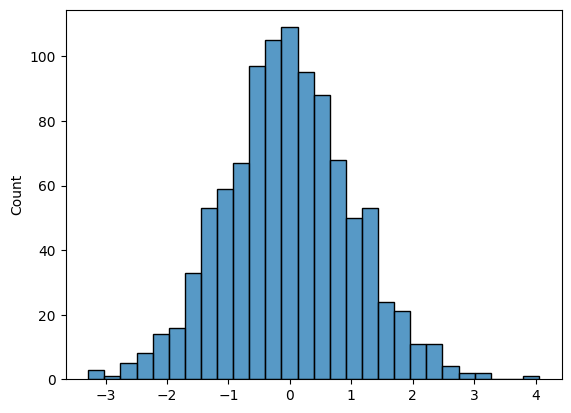

In [ ]:
norm = ss.norm(0,1).rvs(size=1000)
sns.histplot(norm)

### Vector aleatorio

Existen distribuciones tanto discretas como continuas las cuales se pueden representar como vectores aleatorios. Por ejemplo, las muertes en una ciudad por distintas causas (Multinomial). Las continuas naturalmente vienen de familias gaussinas ó exponencial, por ejemplo, los tiempos de dedicación a una actividad en una empresa (Gamma multivariada).

<Axes: xlabel='Count'>

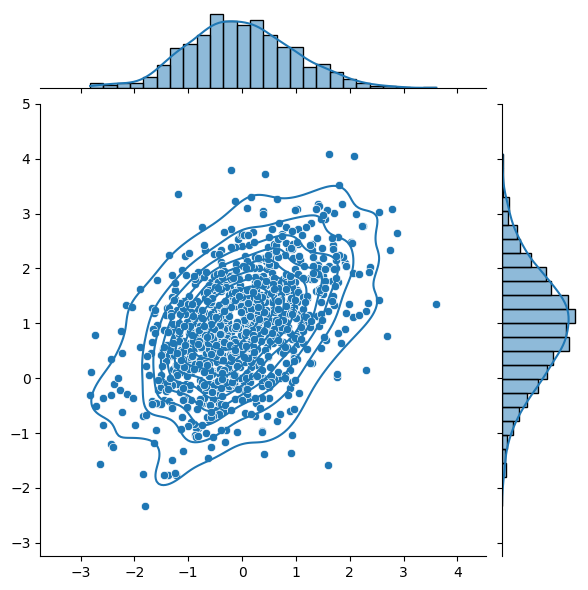

In [ ]:
mn = ss.multivariate_normal([0,1],[[1,1/2],[1/2,1]]).rvs(size=1000)
g = sns.JointGrid(x=mn[:,0],y=mn[:,1])
sns.kdeplot(x=mn[:,0],y=mn[:,1], ax=g.ax_joint)
sns.scatterplot(x=mn[:,0],y=mn[:,1], ax=g.ax_joint)
sns.histplot(x=mn[:,0], kde=True, ax=g.ax_marg_x)
sns.histplot(y=mn[:,1], kde=True, ax=g.ax_marg_y)
#

<Axes: >

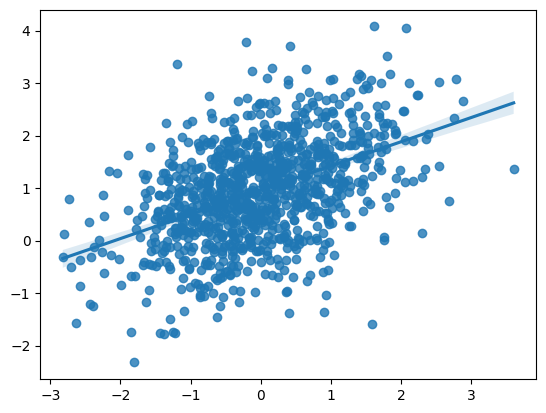

In [ ]:
sns.regplot(x=mn[:,0],y=mn[:,1], n_boot=1000, x_ci={"ci":0.95})

# Ejemplo práctico

In [ ]:
import sklearn.datasets as skd
import statsmodels.formula.api as sfa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

A = skd.load_iris(as_frame=True)

F1 = A.data

F1.columns = ["sl","sw", "pl", "pw"]

F1

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Text(0.5, 0.5, 'sw')

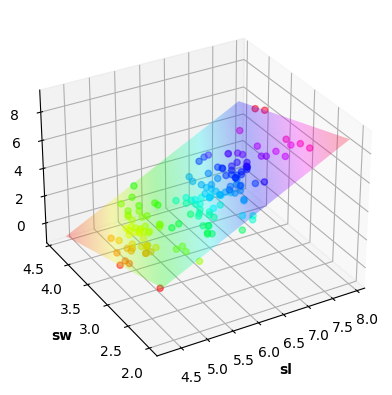

In [ ]:
model = sfa.ols("pl ~ sl+sw", data=F1).fit()

x , y = np.meshgrid(np.linspace(F1.sl.min(),F1.sl.max(), 100), np.linspace(F1.sw.min(),F1.sw.max(),100))

XY = pd.DataFrame({"sl":x.ravel(), "sw":y.ravel()})

z_pred = model.predict(XY)

fig = plt.figure()

my_cmap = plt.get_cmap("hsv")

ax = fig.add_subplot(111,projection="3d")

sctt = ax.scatter3D(F1.sl,F1.sw,F1.pl, c=F1.sl+F1.sw+F1.pl, cmap=my_cmap, alpha=0.5)

trisurf = ax.plot_trisurf(x.ravel(),y.ravel(),z_pred, cmap=my_cmap,alpha=0.3)

ax.view_init(elev=30, azim=-120)

ax.set_xlabel("sl", fontweight = "bold")
ax.set_ylabel("sw", fontweight = "bold")




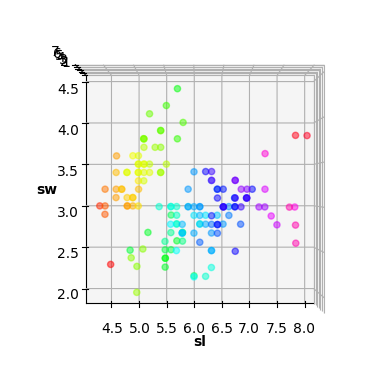

In [ ]:
fig = plt.figure()

my_cmap = plt.get_cmap("hsv")

ax = fig.add_subplot(111,projection="3d")
sctt = ax.scatter3D(F1.sl,F1.sw,F1.pl, c=F1.sl+F1.sw+F1.pl, cmap=my_cmap, alpha=0.5)
ax.set_xlabel("sl", fontweight = "bold")
ax.set_ylabel("sw", fontweight = "bold")
ax.view_init(elev=90, azim=-90)

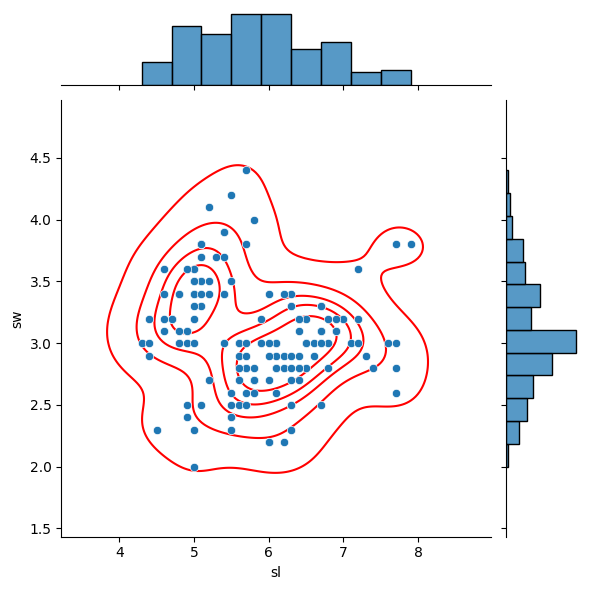

In [ ]:
g = sns.jointplot(data=F1, x="sl", y="sw")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)


---
# Análisis Multivariado

$u_\alpha' Z' Z u_\alpha = \lambda_\alpha $

Donde $\lambda_\alpha$ es la inercia o la varianza de los individuos y las variables frente al epicentro y $u_\alpha$ es el vector de autovalores propios de la matriz $Z'Z$, luego, Z se define $$Z = \frac{X_c}{\sqrt{n}\sigma}$$

y a su vez $$X_c = X-\boldsymbol{1_n \mu_X'}$$

In [ ]:
F1 = pd.read_csv("/content/drive/MyDrive/Cursoexpress/LebartACP.csv", index_col=0)
n,p = F1.shape
Xc=F1-F1.mean().T

In [ ]:
Z = Xc/((n-1)**(1/2))
Z.T@Z

,Sueño,Repo,Comc,Comr,Trar,Dome,Visa,Jard,Dive,Must,Lect,Comp,Pase,Apie,Auto,Frec
Sueño,281.617949,32.139231,31.264872,-10.538590,-415.907350,31.997650,60.833803,-40.521838,-16.807949,2.779530,-40.707179,-6.264829,-0.299915,14.201197,-36.604786,223.760256
Repo,32.139231,82.276923,8.418462,-21.760769,-121.535897,7.204487,-9.909744,47.670641,-33.740000,-3.737949,-10.883846,15.412436,3.216410,6.873974,-23.046667,126.888462
Comc,31.264872,8.418462,82.304103,-38.031282,-9.123376,-1.009915,-8.065684,108.710214,-30.144872,-3.266752,-7.378333,-14.452265,1.359060,-6.390855,-57.470427,112.726795
Comr,-10.538590,-21.760769,-38.031282,63.355641,-3.765684,29.705085,10.821239,-142.720171,24.968205,9.703248,16.993590,-2.531496,-0.499017,11.374530,18.973419,-115.419359
Trar,-415.907350,-121.535897,-9.123376,-3.765684,2269.291396,-208.153732,-301.435399,102.232593,30.055684,-52.099516,63.401325,-255.274302,-85.379715,-91.154601,-82.664031,-980.922607
Dome,31.997650,7.204487,-1.009915,29.705085,-208.153732,89.543447,19.524088,-97.032536,-0.432393,11.087151,4.188632,20.668903,10.287849,23.668219,11.039302,15.909701
Visa,60.833803,-9.909744,-8.065684,10.821239,-301.435399,19.524088,182.631652,-7.490356,9.908376,9.717664,-26.927521,30.747493,9.568490,-12.312422,42.004558,5.647778
Jard,-40.521838,47.670641,108.710214,-142.720171,102.232593,-97.032536,-7.490356,777.784046,-66.748675,-27.611738,-79.493034,-64.656011,-0.795954,-87.673105,10.153063,168.198291
Dive,-16.807949,-33.740000,-30.144872,24.968205,30.055684,-0.432393,9.908376,-66.748675,36.783333,3.556752,9.248333,-0.498504,-1.316752,-2.775299,30.791966,-90.184872
Must,2.779530,-3.737949,-3.266752,9.703248,-52.099516,11.087151,9.717664,-27.611738,3.556752,5.566353,-0.114658,1.857165,3.731339,5.783875,-2.350370,5.782094


Lo cual corresponde a la matríz de covarianzas de F1, sin embargo, se pierde puntos decimales.

In [ ]:
F1.cov()

,Sueño,Repo,Comc,Comr,Trar,Dome,Visa,Jard,Dive,Must,Lect,Comp,Pase,Apie,Auto,Frec
Sueño,281.617949,32.139231,31.264872,-10.538590,-415.907350,31.997650,60.833803,-40.521838,-16.807949,2.779530,-40.707179,-6.264829,-0.299915,14.201197,-36.604786,223.760256
Repo,32.139231,82.276923,8.418462,-21.760769,-121.535897,7.204487,-9.909744,47.670641,-33.740000,-3.737949,-10.883846,15.412436,3.216410,6.873974,-23.046667,126.888462
Comc,31.264872,8.418462,82.304103,-38.031282,-9.123376,-1.009915,-8.065684,108.710214,-30.144872,-3.266752,-7.378333,-14.452265,1.359060,-6.390855,-57.470427,112.726795
Comr,-10.538590,-21.760769,-38.031282,63.355641,-3.765684,29.705085,10.821239,-142.720171,24.968205,9.703248,16.993590,-2.531496,-0.499017,11.374530,18.973419,-115.419359
Trar,-415.907350,-121.535897,-9.123376,-3.765684,2269.291396,-208.153732,-301.435399,102.232593,30.055684,-52.099516,63.401325,-255.274302,-85.379715,-91.154601,-82.664031,-980.922607
Dome,31.997650,7.204487,-1.009915,29.705085,-208.153732,89.543447,19.524088,-97.032536,-0.432393,11.087151,4.188632,20.668903,10.287849,23.668219,11.039302,15.909701
Visa,60.833803,-9.909744,-8.065684,10.821239,-301.435399,19.524088,182.631652,-7.490356,9.908376,9.717664,-26.927521,30.747493,9.568490,-12.312422,42.004558,5.647778
Jard,-40.521838,47.670641,108.710214,-142.720171,102.232593,-97.032536,-7.490356,777.784046,-66.748675,-27.611738,-79.493034,-64.656011,-0.795954,-87.673105,10.153063,168.198291
Dive,-16.807949,-33.740000,-30.144872,24.968205,30.055684,-0.432393,9.908376,-66.748675,36.783333,3.556752,9.248333,-0.498504,-1.316752,-2.775299,30.791966,-90.184872
Must,2.779530,-3.737949,-3.266752,9.703248,-52.099516,11.087151,9.717664,-27.611738,3.556752,5.566353,-0.114658,1.857165,3.731339,5.783875,-2.350370,5.782094


# Si añadimos la desviación estandar a la Z, conseguimos la matríz de correlación

In [ ]:
Z = Z/F1.std().T
Z.T@Z

,Sueño,Repo,Comc,Comr,Trar,Dome,Visa,Jard,Dive,Must,Lect,Comp,Pase,Apie,Auto,Frec
Sueño,1.000000,0.211138,0.205360,-0.078897,-0.520261,0.201498,0.268242,-0.086582,-0.165143,0.070203,-0.434636,-0.038675,-0.004518,0.165871,-0.189672,0.401804
Repo,0.211138,1.000000,0.102302,-0.301400,-0.281268,0.083936,-0.080842,0.188444,-0.613311,-0.174666,-0.214995,0.176030,0.089634,0.148540,-0.220935,0.421546
Comc,0.205360,0.102302,1.000000,-0.526669,-0.021111,-0.011764,-0.065787,0.429665,-0.547870,-0.152623,-0.145725,-0.165037,0.037868,-0.138078,-0.550843,0.374436
Comr,-0.078897,-0.301400,-0.526669,1.000000,-0.009931,0.394386,0.100600,-0.642929,0.517213,0.516701,0.382541,-0.032949,-0.015848,0.280102,0.207275,-0.436966
Trar,-0.520261,-0.281268,-0.021111,-0.009931,1.000000,-0.461766,-0.468232,0.076951,0.104029,-0.463557,0.238473,-0.555159,-0.453054,-0.375066,-0.150892,-0.620513
Dome,0.201498,0.083936,-0.011764,0.394386,-0.461766,1.000000,0.152674,-0.367681,-0.007534,0.496613,0.079312,0.226285,0.274820,0.490257,0.101442,0.050665
Visa,0.268242,-0.080842,-0.065787,0.100600,-0.468232,0.152674,1.000000,-0.019874,0.120890,0.304781,-0.357021,0.235709,0.178976,-0.178579,0.270273,0.012594
Jard,-0.086582,0.188444,0.429665,-0.642929,0.076951,-0.367681,-0.019874,1.000000,-0.394628,-0.419642,-0.510722,-0.240179,-0.007214,-0.616186,0.031656,0.181741
Dive,-0.165143,-0.613311,-0.547870,0.517213,0.104029,-0.007534,0.120890,-0.394628,1.000000,0.248567,0.273227,-0.008515,-0.054881,-0.089693,0.441475,-0.448094
Must,0.070203,-0.174666,-0.152623,0.516701,-0.463557,0.496613,0.304781,-0.419642,0.248567,1.000000,-0.008708,0.081549,0.399778,0.480516,-0.086625,0.073852


In [ ]:
F1.corr()

,Sueño,Repo,Comc,Comr,Trar,Dome,Visa,Jard,Dive,Must,Lect,Comp,Pase,Apie,Auto,Frec
Sueño,1.000000,0.211138,0.205360,-0.078897,-0.520261,0.201498,0.268242,-0.086582,-0.165143,0.070203,-0.434636,-0.038675,-0.004518,0.165871,-0.189672,0.401804
Repo,0.211138,1.000000,0.102302,-0.301400,-0.281268,0.083936,-0.080842,0.188444,-0.613311,-0.174666,-0.214995,0.176030,0.089634,0.148540,-0.220935,0.421546
Comc,0.205360,0.102302,1.000000,-0.526669,-0.021111,-0.011764,-0.065787,0.429665,-0.547870,-0.152623,-0.145725,-0.165037,0.037868,-0.138078,-0.550843,0.374436
Comr,-0.078897,-0.301400,-0.526669,1.000000,-0.009931,0.394386,0.100600,-0.642929,0.517213,0.516701,0.382541,-0.032949,-0.015848,0.280102,0.207275,-0.436966
Trar,-0.520261,-0.281268,-0.021111,-0.009931,1.000000,-0.461766,-0.468232,0.076951,0.104029,-0.463557,0.238473,-0.555159,-0.453054,-0.375066,-0.150892,-0.620513
Dome,0.201498,0.083936,-0.011764,0.394386,-0.461766,1.000000,0.152674,-0.367681,-0.007534,0.496613,0.079312,0.226285,0.274820,0.490257,0.101442,0.050665
Visa,0.268242,-0.080842,-0.065787,0.100600,-0.468232,0.152674,1.000000,-0.019874,0.120890,0.304781,-0.357021,0.235709,0.178976,-0.178579,0.270273,0.012594
Jard,-0.086582,0.188444,0.429665,-0.642929,0.076951,-0.367681,-0.019874,1.000000,-0.394628,-0.419642,-0.510722,-0.240179,-0.007214,-0.616186,0.031656,0.181741
Dive,-0.165143,-0.613311,-0.547870,0.517213,0.104029,-0.007534,0.120890,-0.394628,1.000000,0.248567,0.273227,-0.008515,-0.054881,-0.089693,0.441475,-0.448094
Must,0.070203,-0.174666,-0.152623,0.516701,-0.463557,0.496613,0.304781,-0.419642,0.248567,1.000000,-0.008708,0.081549,0.399778,0.480516,-0.086625,0.073852


# Prueba de Bartlett y KMO

## Prueba de Bartlett:

$\chi^{2}_{o}=\frac{(N-k)ln(S^{2}_{p})-\sum_{i=1}^{k}(n_i-1)ln(s^{2})}{
  1+\frac{1}{3(k-1)}\left(\sum_{i=1}^{k}\left(\frac{1}{n_i-1}\right) - \frac{1}{N-k}\right)
}; \hspace{0.5cm} N=\sum_{i}^{k}n_{i}; \hspace{0.5cm}S^{2}_{p}=\frac{1}{N-k}\sum_{i=1}^{k}(n_i-1)S^{2}_{i}
$

La prueba no rechaza que las k varianzas son iguales(**$H_o$**) cuando
$$P(X^{2}_{k-1}>\chi^{2}_o)>\alpha$$

## Prueba KMO (Kaiser-Meyer-Olkin)
- $R$ es la matr\'iz de correlaci\'on
- $V = R^{-1}$ es la inversa de la matr\'iz de correlaci\'on
- $A$ es la matr\'iz compuesta por elementos $a_{ij}=-\frac{v_{ij}}{\sqrt{v_{ii}*v_{jj}}}$

$KMO_j=\frac{\sum_{i\neq j}r_{ij}^{2}}
{\sum_{i\neq j}r_{ij}^{2}+\sum_{i\neq j}a_{ij}}$


El test nos aroja un rango de valores en los cuales se puede decidir si el ACP es adecuado de realizar. Si el valor es mayor a 0.6, no generará los mejores resultados sin embargo, será aceptable.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

#Bartlett
chi_square_value,p_value = calculate_bartlett_sphericity(F1)
print(chi_square_value, p_value)


#KMO
kmo_all,kmo_model = calculate_kmo(F1)
print(kmo_model)





257.35236893658924 4.970853398717616e-12
0.3854817748865855


### Uso de prince para ACP

#### Inercias

In [ ]:
import prince as pc

F_1 = pc.PCA(n_components=p).fit(F1)
sum_ei = F_1.eigenvalues_summary
sum_ei

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,3.872,24.20%,24.20%
1,3.659,22.87%,47.07%
2,2.007,12.54%,59.62%
3,1.514,9.47%,69.08%
4,1.127,7.04%,76.12%
5,0.838,5.24%,81.36%
6,0.766,4.79%,86.15%
7,0.596,3.73%,89.87%
8,0.445,2.78%,92.65%


(0.0, 0.24202090324248945)

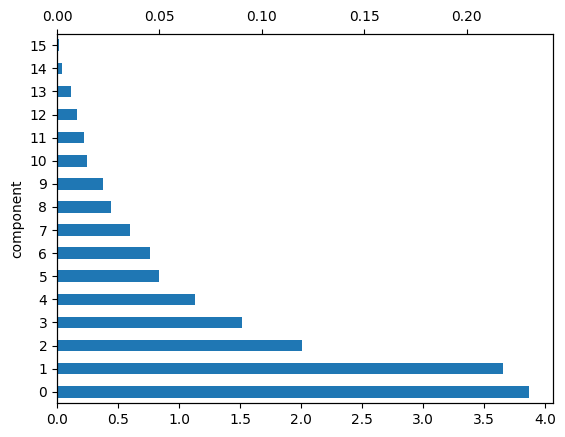

In [ ]:
fig, ax = plt.subplots()
sum_ei.loc[:, 'eigenvalue'].astype("float64").plot(kind="barh", ax=ax)
ax2 = ax.twiny()
ax2.set_xlim(0, F_1.percentage_of_variance_.max()/100)

#### Nuevas coordenadas.

$\psi=Zu \hspace {2cm} \varphi=Z'v=\frac{Z'}{\sqrt{\lambda}}\psi=\sqrt{\lambda}u$



In [ ]:
#Coordenadas en filas

co_f = F_1.row_coordinates(F1)
co_c = F_1.column_coordinates_

co_f

component,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1111,-1.996375,-0.860593,1.779130,-1.402166,-1.809517,-1.124199,1.568151,-0.896906,-0.388790,1.317624,0.048212,0.453177,0.241725,0.014108,-0.052267,0.221566
1115,-2.281598,5.093600,-1.931196,-3.072564,1.542022,-0.635054,0.273147,0.117581,0.088563,0.118656,-0.057727,-0.253949,-0.271384,0.372489,-0.069110,-0.121810
1121,0.711686,-1.009279,1.344629,-2.055275,-0.514023,-0.918517,-0.968587,0.020832,-0.818898,-0.172894,0.011527,-0.212333,0.110348,-0.386023,0.026733,-0.199044
1122,1.851005,0.644727,2.706447,0.640600,0.377715,-0.317611,-0.777465,-0.394572,-0.482820,-0.077908,-0.236235,0.453794,0.272743,0.318625,0.122036,-0.120261
1123,1.267372,1.813195,1.992330,0.823092,0.539702,-1.531361,-0.679168,0.232742,0.820987,-0.481641,0.474593,-0.106415,-0.468384,0.542609,-0.264280,0.270562
1124,2.709182,2.945688,-0.044404,-0.912658,-0.741317,0.283217,-0.377625,-0.452935,-0.505970,-0.200430,0.800926,-0.175811,-0.269829,-0.398673,-0.165021,0.022326
1136,0.565920,-1.962558,0.224961,-0.285705,0.528863,0.087441,1.456994,-1.168490,-0.064442,-1.207901,-0.604653,-0.822492,-0.195461,0.197035,0.076384,0.015994
1133,4.208933,0.315057,1.895363,-0.780661,-0.546994,0.979666,0.907026,1.290072,0.356513,0.536565,-0.831349,-0.178684,-0.095075,-0.157593,-0.282853,-0.169354
1134,4.290876,0.928016,-1.684599,-0.796728,0.131241,-0.185531,-0.342912,-0.533249,0.786621,-0.088027,0.112661,-0.102024,1.151541,-0.038897,0.422545,0.198997
2111,-1.899017,-2.126600,0.884660,0.239848,-0.238656,-0.510821,-1.127790,1.316027,0.008347,0.011809,-0.195401,0.184971,0.269280,0.653296,0.072607,0.030487


In [ ]:
co_c

component,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
variable,,,,,,,,,,,,,,,,
Sueño,-0.221126,0.517222,0.179317,-0.496128,0.404990,-0.265460,0.185444,0.022055,0.330474,-0.088979,0.110603,-0.009109,0.047587,-0.044396,-0.007260,-0.046808
Repo,-0.461279,0.401329,-0.167086,0.259695,0.465225,0.347754,-0.257516,-0.165941,0.025137,-0.233072,-0.148167,-0.140792,0.036410,0.005648,-0.038619,0.000438
Comc,-0.669718,0.142630,-0.233922,-0.219802,-0.379911,0.029156,0.496743,-0.041933,-0.050864,-0.102183,-0.081318,-0.008084,0.072420,-0.020547,-0.088957,0.033492
Comr,0.842109,0.002234,-0.066605,-0.265880,0.094487,0.179142,-0.075160,-0.055955,-0.010647,-0.210332,-0.024056,0.335698,0.070269,0.046713,-0.033513,0.007231
Trar,-0.050994,-0.879677,-0.343328,-0.078008,-0.073497,0.060128,-0.096803,-0.147204,0.101825,0.155017,-0.076617,0.022664,-0.069686,-0.021354,-0.082160,-0.081895
Dome,0.400375,0.572092,-0.079742,-0.141253,0.043922,0.509415,0.314458,0.200908,0.099375,0.199014,-0.170683,-0.010786,-0.063823,0.021489,0.041329,-0.021091
Visa,0.128040,0.330473,0.733399,-0.171678,-0.099474,0.029736,0.105303,-0.493991,-0.123896,0.031961,0.002317,-0.046477,-0.076806,0.127758,-0.006317,-0.018771
Jard,-0.761675,-0.218403,0.354211,0.116938,-0.231124,0.237220,-0.063000,0.232832,-0.005211,-0.050828,0.075865,0.042568,0.181256,0.137755,0.021423,-0.051694
Dive,0.721296,-0.301553,0.297027,-0.085515,-0.095232,-0.330957,-0.048177,0.193892,0.095246,-0.091610,-0.280820,-0.155708,0.079424,0.086382,-0.020048,0.001512


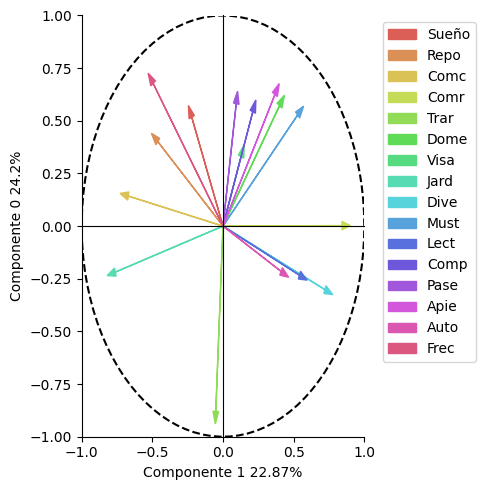

In [ ]:

fig, ax = plt.subplots(figsize=(5,5))

color =  sns.color_palette("hls", p)

for i in co_c.index:

  ax.arrow(x=0, y=0, dx=co_c.loc[i,0], dy=co_c.loc[i,1], label=i, head_width = 0.04, color = color[list(co_c.index).index(i)])

ax.legend(bbox_to_anchor=(1.04,1))

sp = list(ax.spines.keys())
sp.pop(0)
sp.pop(1)
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)
x = np.cos(x)
ax.plot(x,y, color="black", linestyle="--")
for i in sp:
  ax.spines[i].set_position(('data', 0))
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_ylabel(f"Componente 0 {round(F_1.percentage_of_variance_[0],2)}%")
ax.set_xlabel(f"Componente 1 {round(F_1.percentage_of_variance_[1],2)}%")
fig.tight_layout()

#### Conclusión ACP

{'row_cor': component        0         1         2         3         4         5   \
 1111      -1.996375 -0.860593  1.779130 -1.402166 -1.809517 -1.124199   
 1115      -2.281598  5.093600 -1.931196 -3.072564  1.542022 -0.635054   
 1121       0.711686 -1.009279  1.344629 -2.055275 -0.514023 -0.918517   
 1122       1.851005  0.644727  2.706447  0.640600  0.377715 -0.317611   
 1123       1.267372  1.813195  1.992330  0.823092  0.539702 -1.531361   
 1124       2.709182  2.945688 -0.044404 -0.912658 -0.741317  0.283217   
 1136       0.565920 -1.962558  0.224961 -0.285705  0.528863  0.087441   
 1133       4.208933  0.315057  1.895363 -0.780661 -0.546994  0.979666   
 1134       4.290876  0.928016 -1.684599 -0.796728  0.131241 -0.185531   
 2111      -1.899017 -2.126600  0.884660  0.239848 -0.238656 -0.510821   
 2112      -1.439821  1.670567  1.765526  0.562375  0.684932  2.355497   
 2117      -1.037961  2.154181 -1.150792  1.170346 -1.006667 -0.539735   
 2121      -1.248546 -2.553

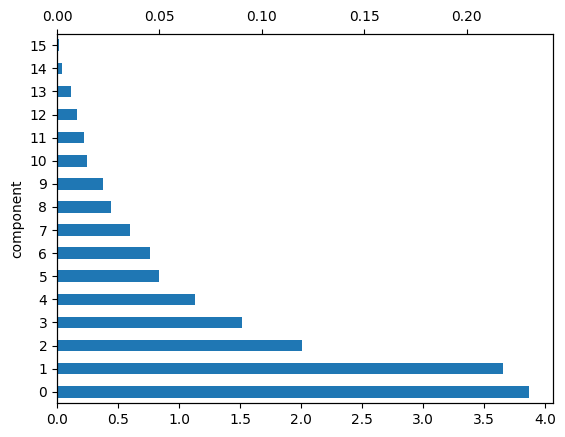

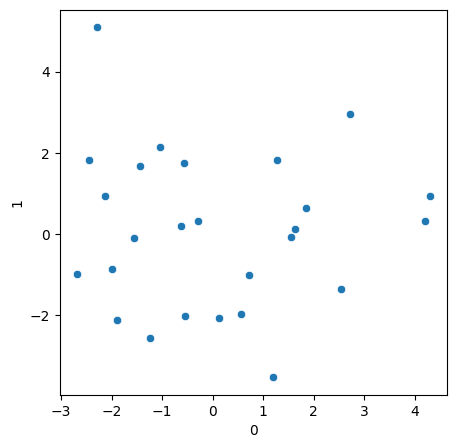

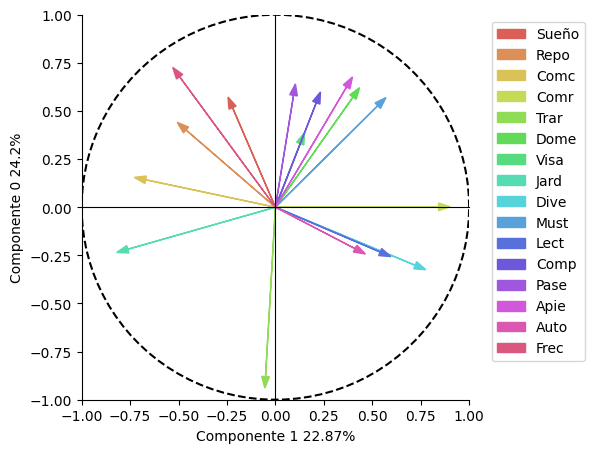

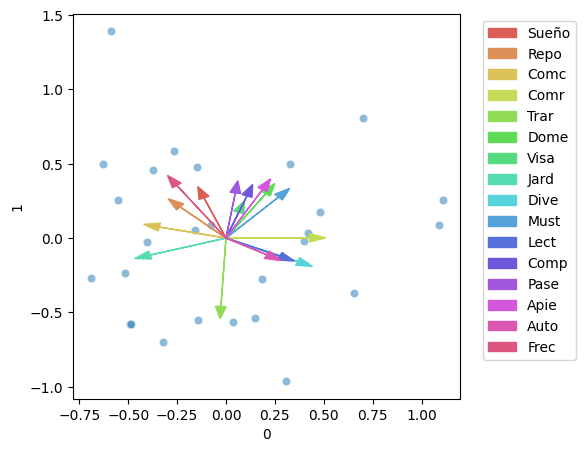

In [ ]:
# Función summary ACP

def summary(PCA_object, data, cat=None):

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  import seaborn as sns

  n,p = data.shape

  summ = {}

  summ.update({"row_cor":PCA_object.row_coordinates(data)})

  summ.update({"row_cor_s":PCA_object.row_standard_coordinates(data)})

  summ.update({"row_cont":PCA_object.row_contributions_})

  summ.update({"row_cos":PCA_object.row_cosine_similarities(data)})

  summ.update({"col_cor":PCA_object.column_coordinates_})

  summ.update({"col_cont":PCA_object.column_contributions_})

  summ.update({"col_corr":PCA_object.column_correlations})

  summ.update({"col_cos":PCA_object.column_cosine_similarities_})

  summ.update({"var":PCA_object.eigenvalues_summary})

  plot_var, ax = plt.subplots()
  summ["var"].loc[:, 'eigenvalue'].astype("float64").plot(kind="barh", ax=ax)
  ax2 = ax.twiny()
  ax2.set_xlim(0, PCA_object.percentage_of_variance_.max()/100)

  summ.update({"plot_var":plot_var})


  ind_graph, ax = plt.subplots(figsize=(5,5))

  g = sns.scatterplot(summ["row_cor"], x=0, y=1, hue=cat, ax=ax)

  summ.update({"ind_graph":ind_graph})


  co_c = summ["col_cor"]

  color = sns.color_palette("hls", p)

  fig, ax = plt.subplots(figsize=(5,5))

  for i in co_c.index:

    ax.arrow(x=0, y=0, dx=co_c.loc[i,0], dy=co_c.loc[i,1], label=i, head_width = 0.04, color = color[list(co_c.index).index(i)])

  ax.legend(bbox_to_anchor=(1.04,1))

  sp = list(ax.spines.keys())
  sp.pop(0)
  sp.pop(1)
  x = np.linspace(0,2*np.pi,100)
  y = np.sin(x)
  x = np.cos(x)
  ax.plot(x,y, color="black", linestyle="--")
  for i in sp:
    ax.spines[i].set_position(('data', 0))
  ax.set_ylim(-1,1)
  ax.set_xlim(-1,1)
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')
  ax.set_ylabel(f"Componente 0 {round(PCA_object.percentage_of_variance_[0],2)}%")
  ax.set_xlabel(f"Componente 1 {round(PCA_object.percentage_of_variance_[1],2)}%")


  summ.update({"col_graph":fig})

  phi = summ["col_cor"]

  values = summ["var"].loc[:, 'eigenvalue'].astype("float64")

  u = phi/np.sqrt(values)

  ind_var_graph, ax = plt.subplots(figsize=(5,5))

  g = sns.scatterplot(summ["row_cor_s"], x=0, y=1, hue=cat, ax=ax, alpha=0.5)

  for i in u.index:

    ax.arrow(x=0, y=0, dx=u.loc[i,0], dy=u.loc[i,1], label=i, head_width = 0.055, color = color[list(u.index).index(i)])

  ax.legend(bbox_to_anchor=(1.04,1))


  summ.update({"ind_var_graph":ind_var_graph})

  return summ

summary(F_1,F1)



* [Parte 3](https://colab.research.google.com/drive/1D73wCzjIq4EHqVRfLiVdppgzn4pkHcDB#scrollTo=wb6xBqT7c3Jm)
* [Parte 4](https://colab.research.google.com/drive/1rmwyvlnePxlI2Y8vU5pKXnjx8YvCS9JG?hl=es#scrollTo=8zNuaE5ALEy2)

# Bibliografía

[Lebart, L., Morineau, A., & Piron, M. (1995). Statistique exploratoire multidimensionnelle (Vol. 3). Paris: Dunod.](https://www.iberlibro.com/Statistique-exploratoire-multidimensionnelle-LEBART-Ludovic-MORINEAU/17045216416/bd)